In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import get_window
import librosa
import librosa.display

In [2]:
Fs = 16000 # Sampling rate 16kHz
m1 = int(5/1000 * Fs)
m2 = int(20/1000 * Fs)
m3 = int(40/1000 * Fs)  # 초당 Sample되는 수
time = np.arange(m3) # 초당 샘플되는... np.arange(start,end,interval)
# ex) >> [0,1,2,3,4,5,6,7,...,78,79]
window = get_window('hamming', m3)

(-0.025, 1.025)

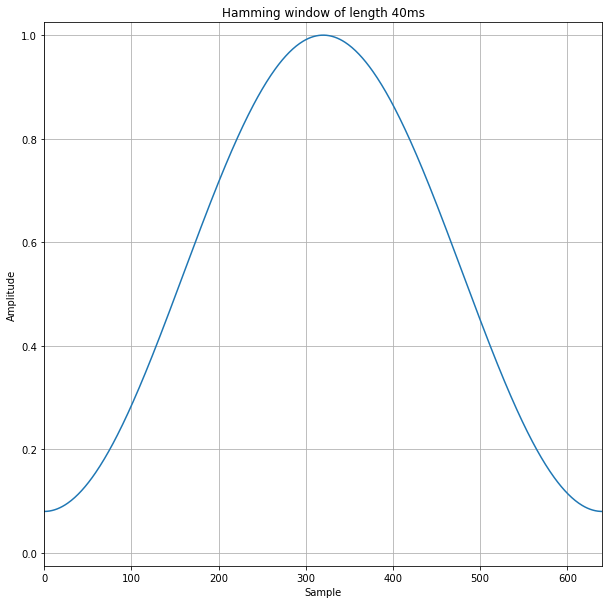

In [3]:
plt.figure(figsize=(10,10))
plt.plot(time, window)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Hamming window of length 40ms")
plt.xlim(0,m3)
plt.grid(True)
plt.ylim(-0.025,1.025)



fft shape :  (2048,)
spectrum shape :  (2048,)
len(spectrum) :  2048
freq =  2048


C:\Users\yukeun\AppData\Local\Temp\ipykernel_6980\2976233973.py:12: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(spectrum) # log취해줘야 더 디테일한 변화를 관찰가능하다.


(-100.0, 40.0)

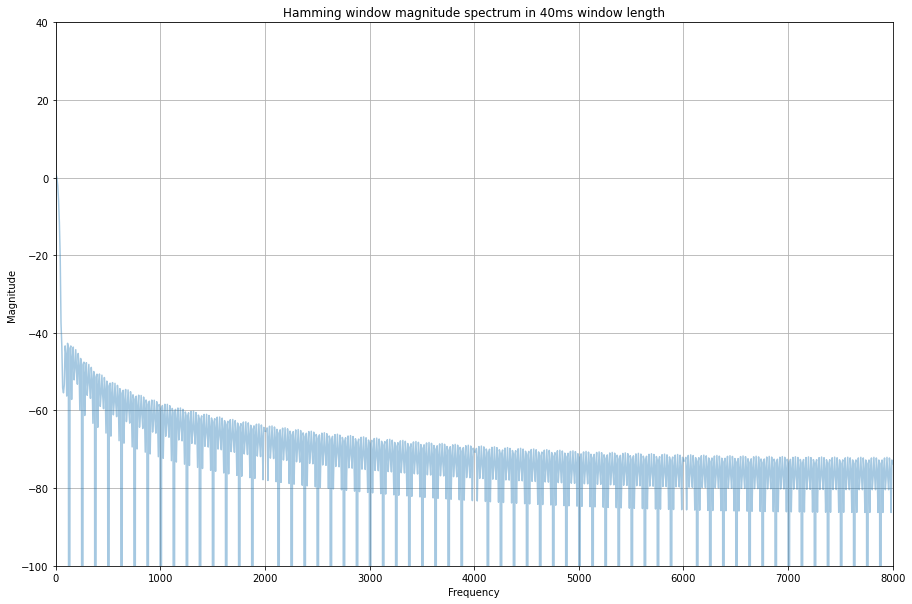

In [4]:
# FFT

# Perform Fourier Transform
fft = np.fft.fft(window, 2048) / ((m3 / 2) + 1) # FFT는 2의N승의 sample을 가지고 푸리에트랜스폼을 진행한다.
# 단 2의 N승은 기존 신호의 초당 sampling된 수 보다 크거나 같아야한다. 일반적으로 2048 or 1024를 많이 쓴다.
print("fft shape : ", fft.shape) 

#Calculate abs values on complex numbers to get magnitude : Ft했으므로 주파수영역으로 표현가능하며 일반적으로 polar form이므로 magnitude만을 구하기 위해선 절댓값 취해줘야 한당
spectrum = np.abs(np.fft.fftshift(fft))
# fft.fft를 수행하여 얻어진 푸리에 변환 결과는 주파수는 0인 컴포넌트를 좌상단에 위치시킵니다.
# np.fft.fftshift(f)는 주파수가 0인 부분을 정중앙에 위치시키고 재배열시켜준다.
magnitude = 20 * np.log10(spectrum) # log취해줘야 더 디테일한 변화를 관찰가능하다.
print("spectrum shape : ", spectrum.shape)
print("len(spectrum) : ", len(spectrum))

# Get discrete sample frequency
freq = np.linspace(-8000,8000,len(fft)) # Nyquist 주파수가 Fs 표현할 수 있는 주파수는 최대 8000Hz이다.
print("freq = ", len(freq))
# Create Frequency variable
# f= np.linspace(0, Fs, len(spectrum)) # => np.linspace(구간 시작점, 구각 끝점, 구간 내 숫자 개수) 
# print("f shape : ", f.shape)

#plot spectrum
plt.figure(figsize = (15,10))
plt.plot(freq, magnitude, alpha = 0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Hamming window magnitude spectrum in 40ms window length")
plt.grid(True)
plt.xlim(0,8000)
plt.ylim(-100, 40)

In [5]:
time = np.arange(m3) # 초당 샘플되는...

rect_window = get_window('boxcar', m3)

(-0.025, 1.025)

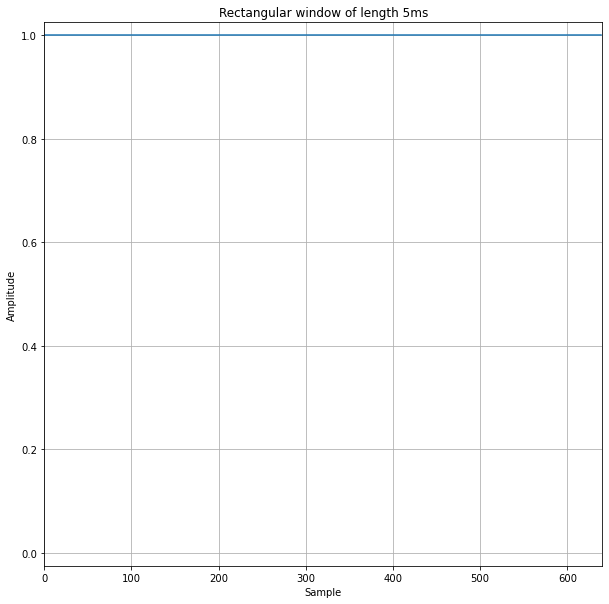

In [6]:
plt.figure(figsize = (10,10))
plt.plot(time, rect_window)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Rectangular window of length 5ms")
plt.xlim(0,m3)
plt.grid(True)
plt.ylim(-0.025,1.025)

fft shape :  (2048,)
spectrum shape :  (2048,)
len(spectrum) :  2048
freq =  2048


C:\Users\yukeun\AppData\Local\Temp\ipykernel_6980\447124538.py:11: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(spectrum)


(-100.0, 40.0)

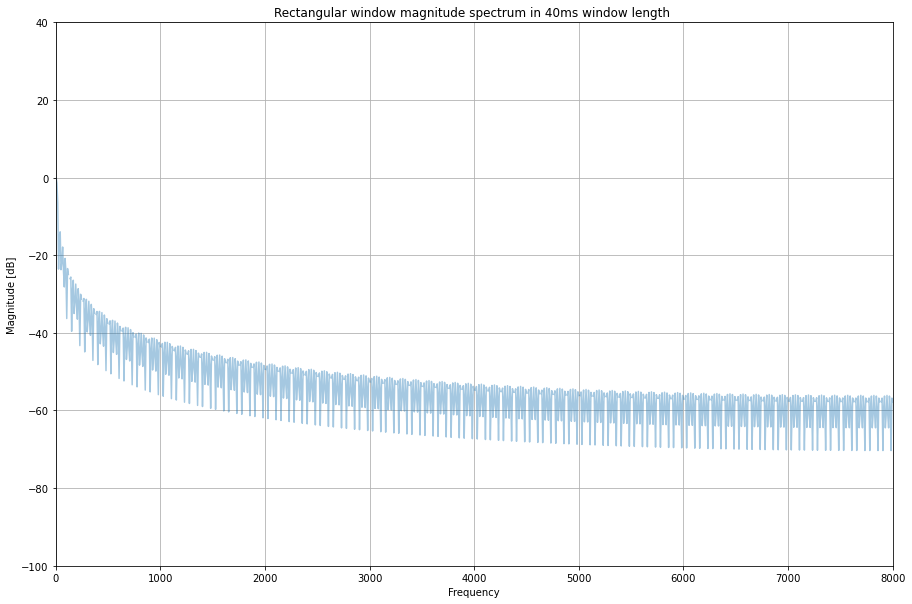

In [7]:
# FFT

# Perform Fourier Transform
fft = np.fft.fft(rect_window, 2048) / (m3)
print("fft shape : ", fft.shape) 

#Calculate abs values on complex numbers to get magnitude : Ft했으므로 주파수영역으로 표현가능하며 일반적으로 polar form이므로 magnitude만을 구하기 위해선 절댓값 취해줘야 한당
spectrum = np.abs(np.fft.fftshift(fft))
# fft.fft를 수행하여 얻어진 푸리에 변환 결과는 주파수는 0인 컴포넌트를 좌상단에 위치시킵니다.
# np.fft.fftshift(f)는 주파수가 0인 부분을 정중앙에 위치시키고 재배열시켜준다.
magnitude = 20 * np.log10(spectrum)
print("spectrum shape : ", spectrum.shape)
print("len(spectrum) : ", len(spectrum))

# Get discrete sample frequency
freq = np.linspace(-8000,8000,len(fft)) # Nyquist 주파수가 Fs 표현할 수 있는 주파수는 최대 8000Hz이다.
print("freq = ", len(freq))
# Create Frequency variable
# f= np.linspace(0, Fs, len(spectrum)) # => np.linspace(구간 시작점, 구각 끝점, 구간 내 숫자 개수) 
# print("f shape : ", f.shape)

#plot spectrum
plt.figure(figsize = (15,10))
plt.plot(freq, magnitude, alpha = 0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude [dB]")
plt.title("Rectangular window magnitude spectrum in 40ms window length ")
plt.grid(True)
plt.xlim(0,8000)
plt.ylim(-100, 40)

In [8]:
# 결론 : Rectangular window에서 Hamming window에 비해 더 많은 side lobe oscillation이 발생한 것을 확인
# 그 이유는 ? time domain rectangular에서 푸리에트랜스폼 결과 주파수 도메인 sinc함수가 된다.

'''좀 더 길게 설명하자면, 
우리가 윈도우를 사용하는 이유는 우리가 출력 및 분석하고자 하는 음성신호가 시간에 따라 급변하는 특성을 가지기에
짧은 시간에 한해서만 신호의 분석이 가능하다. 따라서 윈도우를 사용한다.
일반적으로 그냥 신호를 한번에 FT하면 해당 주파수만을 추출할 수 있겠지만,
DFT의 경우 파형 혹은 신호가 어떤 주기적으로 발생함을 가정한다. DFT의 유한성(finite) 때문일 것이다.
또한 DFT는 harmonic 즉, (1/포착시간)인 1차 harmonic frequency의 배수만을 식별가능하다.
이때, 1차 harmonic frequency를 frequency resolution이라고 한다.
그냥 이것만 기억해! => DFT시 1차 하모닉 frequency의 정수배만을 확인할수있는데(이상적)
window사용했을 경우, 윈도우에 따라 포착한 신호가 불연속할 시 원치하는 주파수성분까지 나타나서 주파수분석이 어려워진다.
따라서 window를 잘 선택하는 게 중요하고 또한 window의 length를 잘 선정하는게 중요하다!
'''
# 보충설명
'''
Rectangular window의 경우 main lobe가 hamming 보다 width가 좁은 반면 main lobe 주파수와 side lobe 주파수간
크기 차이가 얼마나지 않는다 => 별로 좋지 않다. 원치않는 주파수성분을 캐치할 수 있는 가능성이 커지기 때문이다.
Hamming window는 mainlobe가 rectangular보다는 넓지만 mainlobe와 다른 sidelobe간 크기차이가 많이 나고 고주파로 갈 수록
더 크기차이가 많이 나는 것을 확인가능하다.
따라서 hamming window를 사용하는게 원하는 주파수를 분석하는데 더 효과적이라고 할 수 있다.'''

'\nRectangular window의 경우 main lobe가 hamming 보다 width가 좁은 반면 main lobe 주파수와 side lobe 주파수간\n크기 차이가 얼마나지 않는다 => 별로 좋지 않다. 원치않는 주파수성분을 캐치할 수 있는 가능성이 커지기 때문이다.\nHamming window는 mainlobe가 rectangular보다는 넓지만 mainlobe와 다른 sidelobe간 크기차이가 많이 나고 고주파로 갈 수록\n더 크기차이가 많이 나는 것을 확인가능하다.\n따라서 hamming window를 사용하는게 원하는 주파수를 분석하는데 더 효과적이라고 할 수 있다.'